In [45]:
# Essentials
import pandas as pd
from utils.data_utils import get_root_path
import json

# Visualization
import matplotlib.pyplot as plt
import pprint

In [68]:
pp = pprint.PrettyPrinter(indent=4, width=100)

In [79]:
# working directory
root_dir = get_root_path()
results_dir = root_dir + "/results/"
data_file = "signal1M_tweetir_processed.csv"
results_file = "mean_sum_baselines_fscores.csv"
json_results_file = "sum_baselines_ext.json"
path_to_data = results_dir + results_file
print(path_to_data)
path_to_json = results_dir + json_results_file
print(path_to_json)
path_to_datafile = root_dir + "/data/" + data_file
print(path_to_datafile)

C:\Users\HP\Desktop\Tese\Dissertacao\Pratica\Tweet2Story\utils/../results/mean_sum_baselines_fscores.csv
C:\Users\HP\Desktop\Tese\Dissertacao\Pratica\Tweet2Story\utils/../results/sum_baselines_ext.json
C:\Users\HP\Desktop\Tese\Dissertacao\Pratica\Tweet2Story\utils/../data/signal1M_tweetir_processed.csv


In [80]:
tweetir_data = pd.read_csv(path_to_datafile)
tweetir_data.head(1)

,topic,tweetID,relevancy,tweets.created_at,tweets.full_text,tweets.hashtags,tweets.user_mentions,tweets.urls,tweets.user_name,tweets.followers_count,topics.content,topics.title,topics.media-type,topics.source,topics.published
0,00ecb565-8dcb-443e-875c-71babdce2269,638727826393444352,1,01-09-2015 14:59:15+0000,Police say woman was driving drunk with kids i...,[],[],['http://www.recordonline.com/article/20150901...,recordonline,41255,A would-be hit-and-run driver who allegedly st...,VIDEO:Good Samaritans Stop Alleged Hit-and-Run...,News,NBCNews.com,20-09-2015 23:52:37+0000


In [48]:
with open(path_to_json) as f:
    baseline_data = json.load(f)

In [8]:
sum_baseline_scores = pd.read_csv(path_to_data)
sum_baseline_scores.columns = ["baseline", "rouge1", "rouge2", "rougeL", "rougeLsum"]
sum_baseline_scores

,baseline,rouge1,rouge2,rougeL,rougeLsum
0,LexRank,0.225,0.049,0.139,0.182
1,LSA,0.223,0.046,0.135,0.174
2,TextRank,0.241,0.055,0.143,0.186
3,T5,0.224,0.069,0.182,0.182
4,BART,0.202,0.059,0.147,0.147


In [20]:
scores = sum_baseline_scores[["rouge1", "rouge2", "rougeL", "rougeLsum"]]
metric_names = sum_baseline_scores.columns[1:].tolist()

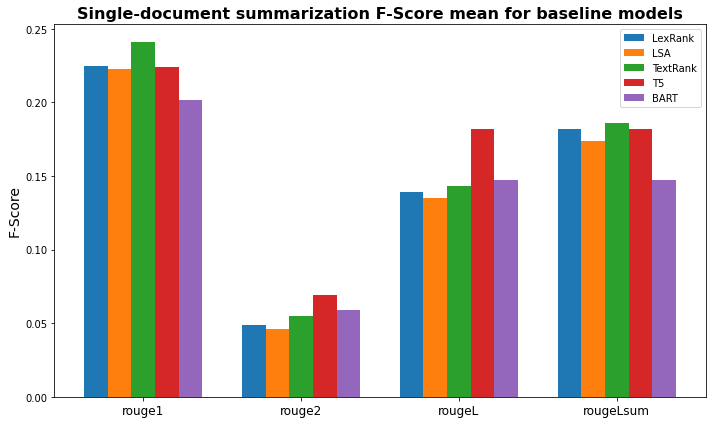

In [44]:
x = np.arange(len(metric_names))
width=0.15

fig, ax = plt.subplots(figsize=(10,6))fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - width*2, sum_baseline_scores.iloc[0, 1:].tolist(), width, label="LexRank")
ax.bar(x - width, sum_baseline_scores.iloc[1, 1:].tolist(), width, label="LSA")
ax.bar(x, sum_baseline_scores.iloc[2, 1:].tolist(), width, label="TextRank")
ax.bar(x + width, sum_baseline_scores.iloc[3, 1:].tolist(), width, label="T5")
ax.bar(x + width*2, sum_baseline_scores.iloc[4, 1:].tolist(), width, label="BART")

ax.set_title("Single-document summarization F-Score mean for baseline models", fontsize=16, fontweight="bold")
ax.set_xticks(x)
ax.set_xticklabels(metric_names, fontsize=12)
ax.set_ylabel("F-Score", fontsize=14)

ax.legend(fontsize=10)

fig.tight_layout()
plt.show()

# Até que ponto é que podemos obter um sumário a partir dos tweets que seja semelhante ao sumário obtido da notícia

Observado o gráfico, repara-se que os _F-Scores_ para os diferentes modelos relativamente a diferentes métricas são todos __baixos__. Os modelos com melhores resultados ao longo das métricas são o __TextRank__ e o __T5__ e mesmo estes não ultrapassam um F-Score de __0.25__.

Este F-Score __baixo__ que resulta da __comparação entre sumários__ (do artigo e dos tweets) é um indicador de como as baselines de sumariação não conseguem, a partir de um conjunto de tweets relacionados com um evento, fazer um sumário que se assemelhe ao sumário do tópico.

O exemplo seguinte mostra as diferenças entre os dois sumários sobre o primeiro tópico utilizando o modelo __TextRank__:

In [78]:
print("Topic Summary:")
print(baseline_data["TextRank"][0]["single_document"]["topic_summary"])
print("\nTweets summary:")
print(baseline_data["TextRank"][0]["single_document"]["tweets_summary"])
print()

Topic Summary:
A would-be hit-and-run driver who allegedly struck a woman in Miami was taken into custody after witnesses chased him down early Sunday.
The car hit the young woman.
A drunk driver and he hit an innocent person, the woman said.

Tweets summary:
Troopers: Hit and run suspect leads 100+ mph chase with infant in the car     #EJI Hit-and–run Mercedes-Benz driver falls in car chase    Driver charged with murder in alleged intentional hit-and-run of Michigan firefighter     Drunk driver arrested following 204km/h chase     Did the driver stop, or is this a hit-and-run situation.
Police have the vehcile, and alleged driver in custody..   Police say theyve located the vehicle and driver in a hit and run at Danforth and Donlands..   Pedestrian killed in hit-and-run in Clarksburg; alleged driver questioned  #fox5dc    #BSO traffic homicide investigators are looking for the hit-and-run driver who struck and killed a man early...



Como seria de esperar, as diferenças são notáveis. O resumo dos tweets tem informações sobre o tópico geral do acontecimento (__hit-and-run__), mas não sobre o evento específico descrito no artigo (__a man hit-and-run a woman in Miami__).

## Resposta:
É possível obter um sumário dos tweets que descreve a notícia, no entanto o modelo terá de __lidar muito bem com ruído__, visto que há muito tweets sobre o tema geral que não são sobre o evento epecífico. As baselines mostram que há muito por onde crescer neste tema, visto que não conseguem produzir um sumário que represente bem a notícia.

# Até que ponto é que podemos obter um sumário a partir dos tweets que seja semelhante à notícia

Neste dataset, é notável que certas notícias são muito difíceis de resumir, devido à especificidade da própria notícia e o facto de não existirem (ou existirem poucos) tweets diretamente relacionados com a mesma.

No entanto, também existem várias notícias (com uma quantidade maior de tweets associados) que são possíveis de se resumir a partir de tweets, como é o exemplo da notícias seguinte.

In [110]:
print("Article content:")
print(tweetir_data.loc[tweetir_data["topic"] == "5811057c-6732-4b37-b04c-ddf0a75a7b51", "topics.content"].unique()[0].replace("  ", "\n"))
print("Tweets related to article: (relevancy = 2)")
for text in tweetir_data.loc[(tweetir_data["topic"] == "5811057c-6732-4b37-b04c-ddf0a75a7b51") & (tweetir_data["relevancy"] >= 2), "tweets.full_text"]:
    print(text)
print()

Article content:
EVIAN, France, Sept 13 AFP - New Zealands Lydia Ko wrote another chapter of golfing history on Sunday when she became the youngest winner of a womens major with a stunning final round 63 at the Evian Championship.
 Sundays flawless eight-birdie round was the lowest score of the week and she finished on 268, 16 under par and six ahead of American Lexi Thompson (70). Chinas Feng Shanshan also shot 70 and was third on eight under.
 Ko is 18 years 142 days - 171 days younger than Morgan Pressel when she won the 2007 Kraft Nabisco Championship.
 Back in February, aged 17, Ko became the youngest player to claim the world No. 1 ranking, although the Evian victory still leaves her at No.2 behind South Koreas Inbee Park.
 She also holds the record as the youngest winner on the LPGA Tour, the first of her nine wins coming as a 15-year-old amateur at the 2012 Canadian Open.
 At Evian on Sunday Australias Minjee Lee (72) was tied for 11th, 12 shots behind the leader while Karrie W

A seguinte notícia fala de uma jogadora de golf nova zelandesa de 18 anos que ganhou pela primeira vez o campeonato feminino de golf em Evian na França. <br/>
Como este foi um acontecimento bastante falado, existem __bastantes tweets associados a esta notícia__ e, é possível verificar que a partir dos tweets existentes seria possível obter um resumo que se assemelhasse à notícia.

## Reposta:
__É possível__ obter um sumário dos tweets que seja semelhante à notícia, mas apenas quando temos dados relevantes suficientes.<br/> A existência de ruído é normal, mas algumas notícias têm apenas tweets de ruídos, __para essas não será possível__ obter um resumo. Para as restantes será possível fazê-lo.